In [41]:
# import needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from copy import deepcopy
from tqdm.auto import tqdm

import random
import time


In [42]:
# constants
BLOCKS_POPULATION_FILE = './data/blocks_population.txt'
CONFIG = './data/problem_config.txt'
MAX_EXE = 2
MAX_BANDWIDTH_FOR_A_BTS = 1000000

sns.set_theme(style="darkgrid")


In [43]:
# read the blocks_population file
population = pd.read_csv(BLOCKS_POPULATION_FILE, header=None)
population


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,196,887,783,254,678,510,56,310,217,127,74,714,133,356,366,455,651,350,477,673
1,697,679,566,71,121,19,341,565,41,499,228,290,687,923,936,619,192,809,910,347
2,513,549,830,960,747,207,686,126,907,39,450,49,173,29,32,235,193,98,288,937
3,259,983,25,316,70,925,196,529,995,556,555,801,738,320,865,520,352,687,925,497
4,654,174,69,500,90,996,286,255,501,334,364,236,242,693,780,655,493,319,615,559
5,197,142,639,101,815,680,552,62,950,721,480,512,966,899,415,975,911,694,194,451
6,235,196,50,986,277,612,277,549,827,533,182,875,540,687,270,400,688,259,856,105
7,504,34,270,71,127,902,546,430,310,641,342,259,116,257,377,499,693,70,922,630
8,941,490,652,767,289,168,382,622,362,208,372,203,209,130,65,657,194,954,267,32
9,121,563,606,521,142,29,386,186,304,288,343,945,70,107,485,564,790,580,9,101


In [44]:
# read the problem_config file
config = pd.read_json(CONFIG, typ='series')
config


tower_construction_cost              500
tower_maintanance_cost                 1
user_satisfaction_levels     [0.2, 1, 3]
user_satisfaction_scores    [10, 20, 40]
dtype: object

In [45]:
# rename the columns and the index
population.rename(index=lambda x: x+0.5, columns=lambda x: x+0.5, inplace=True)
population


,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5
0.5,196,887,783,254,678,510,56,310,217,127,74,714,133,356,366,455,651,350,477,673
1.5,697,679,566,71,121,19,341,565,41,499,228,290,687,923,936,619,192,809,910,347
2.5,513,549,830,960,747,207,686,126,907,39,450,49,173,29,32,235,193,98,288,937
3.5,259,983,25,316,70,925,196,529,995,556,555,801,738,320,865,520,352,687,925,497
4.5,654,174,69,500,90,996,286,255,501,334,364,236,242,693,780,655,493,319,615,559
5.5,197,142,639,101,815,680,552,62,950,721,480,512,966,899,415,975,911,694,194,451
6.5,235,196,50,986,277,612,277,549,827,533,182,875,540,687,270,400,688,259,856,105
7.5,504,34,270,71,127,902,546,430,310,641,342,259,116,257,377,499,693,70,922,630
8.5,941,490,652,767,289,168,382,622,362,208,372,203,209,130,65,657,194,954,267,32
9.5,121,563,606,521,142,29,386,186,304,288,343,945,70,107,485,564,790,580,9,101


In [46]:
# 
GRIDS = population.shape[0]
GRIDS


20

In [47]:
class Neighbor:
    def __init__(self, x, y, population):
        # Initialize the class with x, y and population
        self.x = x
        self.y = y
        self.population = population

    def __eq__(self, other):
        # Check if two neighbors are equal
        return (self.x == other.x) and (self.y == other.y)

    def __hash__(self):
        # Hash the neighbor object
        return hash((self.x, self.y, self.population))

    def __repr__(self):
        # Return a string representation of the object
        return f'Neighbor({self.x}, {self.y}, {self.population})'

    def calculate_bandwidth_per_user(self, bts, neighbors):
        # Calculate bandwidth per user
        return bts.calculate_bandwidth(self, neighbors) / self.population

    def calculate_satisfaction(self, bts, neighbors):
        # Calculate satisfaction based on bandwidth per user
        bpu = self.calculate_bandwidth_per_user(bts, neighbors)

        # Check if the bandwidth per user is less than the minimum required
        if bpu < config['user_satisfaction_levels'][0]:
            satisfaction = 0

        # Check if the bandwidth per user is greater than the maximum required
        elif bpu >= config['user_satisfaction_levels'][-1]:
            satisfaction = config['user_satisfaction_scores'][-1]

        # Check if the bandwidth per user is between the minimum and maximum required
        else:
            for i in range(1, len(config['user_satisfaction_levels'])):
                if config['user_satisfaction_levels'][i - 1] <= bpu < config['user_satisfaction_levels'][i]:
                    satisfaction = config['user_satisfaction_scores'][i - 1]
                    break

        # Return the satisfaction
        return satisfaction * self.population


In [48]:
# Create a list of neighbors
list_of_neighbors = []
for i in population.index:
    for j in population.columns:
        list_of_neighbors.append(Neighbor(i, j, population.loc[i, j]))


# Minimum and maximum of population
min_population = np.min(population.values)
max_population = np.max(population.values)
print(list_of_neighbors)
print(f"{min_population=} {max_population=}")

[Neighbor(0.5, 0.5, 196), Neighbor(0.5, 1.5, 887), Neighbor(0.5, 2.5, 783), Neighbor(0.5, 3.5, 254), Neighbor(0.5, 4.5, 678), Neighbor(0.5, 5.5, 510), Neighbor(0.5, 6.5, 56), Neighbor(0.5, 7.5, 310), Neighbor(0.5, 8.5, 217), Neighbor(0.5, 9.5, 127), Neighbor(0.5, 10.5, 74), Neighbor(0.5, 11.5, 714), Neighbor(0.5, 12.5, 133), Neighbor(0.5, 13.5, 356), Neighbor(0.5, 14.5, 366), Neighbor(0.5, 15.5, 455), Neighbor(0.5, 16.5, 651), Neighbor(0.5, 17.5, 350), Neighbor(0.5, 18.5, 477), Neighbor(0.5, 19.5, 673), Neighbor(1.5, 0.5, 697), Neighbor(1.5, 1.5, 679), Neighbor(1.5, 2.5, 566), Neighbor(1.5, 3.5, 71), Neighbor(1.5, 4.5, 121), Neighbor(1.5, 5.5, 19), Neighbor(1.5, 6.5, 341), Neighbor(1.5, 7.5, 565), Neighbor(1.5, 8.5, 41), Neighbor(1.5, 9.5, 499), Neighbor(1.5, 10.5, 228), Neighbor(1.5, 11.5, 290), Neighbor(1.5, 12.5, 687), Neighbor(1.5, 13.5, 923), Neighbor(1.5, 14.5, 936), Neighbor(1.5, 15.5, 619), Neighbor(1.5, 16.5, 192), Neighbor(1.5, 17.5, 809), Neighbor(1.5, 18.5, 910), Neighbor(1

In [49]:
class BTS:
    def __init__(self, x, y, bandwidth):
        # Initialize the class with x, y and bandwidth
        self.x = x
        self.y = y
        self.bandwidth = bandwidth
        # Calculate the cost of tower construction and maintenance
        self.cost = config['tower_construction_cost'] + \
            (config['tower_maintanance_cost'] * bandwidth)

    def __repr__(self):
        # Return a string representation of the object
        return f'BTS({self.x}, {self.y}, {self.bandwidth})'

    def __eq__(self, other):
        # Check if two BTS objects are equal
        return (self.x == other.x) and (self.y == other.y)

    def __hash__(self):
        # Hash the BTS object
        return hash((self.x, self.y, self.bandwidth))

    def calculate_bandwidth_prime(self, neighbor, neighbors):
        # Calculate bandwidth prime
        return (neighbor.population * self.bandwidth) / neighbors

    def calculate_bandwidth(self, neighbor, neighbors):
        # Calculate bandwidth based on covariance formula between two points
        diff = np.array((neighbor.x, neighbor.y)) - np.array((self.x, self.y))
        cov_ty_bx = np.exp(np.matmul(
            np.matmul((-0.5 * diff), np.linalg.inv(np.array([[8, 0], [0, 8]]))), diff.T))
        return cov_ty_bx * self.calculate_bandwidth_prime(neighbor, neighbors)

In [50]:
class Chromosome:
    def __init__(self, assigned_neighbors=None):
        # Initialize the class with assigned neighbors
        self.bts = list()

        if assigned_neighbors:
            self.assigned_neighbors = assigned_neighbors
        else:
            self.assigned_neighbors = {n: None for n in list_of_neighbors}

        self.cost = None
        self.satisfaction = None
        self.fitness = None

    def __repr__(self):
        # Return a string representation of the object
        return f'N_BTS: {len(self.bts)}, Cost: {self.cost}, Satisfaction: {self.satisfaction}, Fitness: {self.fitness}'

    def initialize(self):
        # Initialize the chromosome with random unique BTS objects in it
        rand = np.random.randint(1, len(list_of_neighbors))
        for __ in range(rand):
            new_gen_bts = BTS(np.random.uniform(0, GRIDS), np.random.uniform(0, GRIDS), np.random.uniform(
                config['user_satisfaction_levels'][0] * min_population, MAX_BANDWIDTH_FOR_A_BTS))
            if new_gen_bts not in self.bts:
                self.bts.append(new_gen_bts)

        # Assign BTS objects to neighbors
        self.assign_bts()

    def assign_bts(self):
        # Assign BTS objects to neighbors based on the Euclidean distance between them
        for neighbor in self.assigned_neighbors:
            bts = min(self.bts, key=lambda b: np.sqrt(
                np.power(b.x - neighbor.x, 2) + np.power(b.y - neighbor.y, 2)))
            self.assigned_neighbors[neighbor] = bts

        assigned = set()
        for neighbor, bts in self.assigned_neighbors.items():
            assigned.add(deepcopy(bts))

        self.bts = list(set(assigned))

    def mutate(self):
        # Mutate the chromosome by adding or removing BTS objects and changing their positions
        rand = np.random.randint(1, len(list_of_neighbors))

        # Add or remove BTS objects if it's needed
        if len(self.bts) < rand:
            while len(self.bts) < rand:
                new_gen_bts = BTS(np.random.uniform(0, GRIDS), np.random.uniform(0, GRIDS), np.random.uniform(
                    config['user_satisfaction_levels'][0] * min_population, MAX_BANDWIDTH_FOR_A_BTS))
                if new_gen_bts not in self.bts:
                    self.bts.append(new_gen_bts)
        else:
            self.bts = random.sample(self.bts, k=rand)

        u = np.random.normal(0, 1)

        # Calculate standard deviation of x coordinates of BTS objects
        std_dev_x_bts = np.std([b.x for b in self.bts]) * \
            np.exp(u/np.sqrt(len(self.bts)))

        # Calculate standard deviation of y coordinates of BTS objects
        std_dev_y_bts = np.std([b.y for b in self.bts]) * \
            np.exp(u/np.sqrt(len(self.bts)))

        # Calculate standard deviation of bandwidth of BTS objects
        std_dev_bandwidth_bts = np.std(
            [b.bandwidth for b in self.bts]) * np.exp(u/np.sqrt(len(self.bts)))

        for b in self.bts:
            # location and bandwidth Gaussian mutation
            b.x += np.random.normal(0, std_dev_x_bts)
            b.x = max(b.x, 0)
            b.x = min(b.x, GRIDS)

            b.y += np.random.normal(0, std_dev_y_bts)
            b.y = max(b.y, 0)
            b.y = min(b.y, GRIDS)

            b.bandwidth += np.random.normal(0, std_dev_bandwidth_bts)
            b.bandwidth = max(
                b.bandwidth, (config['user_satisfaction_levels'][0] * min_population))
            b.bandwidth = min(b.bandwidth, MAX_BANDWIDTH_FOR_A_BTS)

        # neighbors
        self.assign_bts()

    def recombinate(self, other):
        # Recombinate the chromosome with another chromosome

        # Deep copy the assigned neighbors
        s_a_n = deepcopy(self.assigned_neighbors)
        o_a_n = deepcopy(other.assigned_neighbors)

        # Calculate the number of BTS objects in the offspring
        number_of_bts = int(
            (2 * len(self.bts) * len(other.bts)) / (len(self.bts) + len(other.bts)))
        
        # Calculate the cross over point
        cross_over_point_self = np.random.randint(0, len(self.bts))
        cross_over_point_other = np.random.randint(0, len(other.bts))

        # One-point crossover the BTS objects
        bts_offspring1 = []
        bts_offspring1.extend(self.bts[:cross_over_point_self])
        bts_offspring1.extend(other.bts[cross_over_point_other:])

        random.shuffle(bts_offspring1)
        bts_offspring1 = bts_offspring1[:number_of_bts]

        bts_offspring2 = []
        bts_offspring2.extend(other.bts[:cross_over_point_other])
        bts_offspring2.extend(self.bts[cross_over_point_self:])

        random.shuffle(bts_offspring2)
        bts_offspring2 = bts_offspring2[:number_of_bts]

        bts_offspring1 = list(set(bts_offspring1))
        bts_offspring2 = list(set(bts_offspring2))

        # Assigns a new BTS object to the neighbor if it is not already assigned
        for neighbor in s_a_n:
            if s_a_n[neighbor] not in bts_offspring1:
                s_a_n[neighbor] = min(bts_offspring1, key=lambda b: np.sqrt(
                    np.power(b.x - neighbor.x, 2) + np.power(b.y - neighbor.y, 2)))
        # Remove the BTS objects that are not assigned to any neighbor
        assigned = set()
        for neighbor, bts in s_a_n.items():
            assigned.add(deepcopy(bts))
        bts_offspring1 = list(set(assigned))

        # Assigns a new BTS object to the neighbor if it is not already assigned
        for neighbor in o_a_n:
            if o_a_n[neighbor] not in bts_offspring2:
                o_a_n[neighbor] = min(bts_offspring2, key=lambda b: np.sqrt(
                    np.power(b.x - neighbor.x, 2) + np.power(b.y - neighbor.y, 2)))

        # Remove the BTS objects that are not assigned to any neighbor
        assigned = set()
        for neighbor, bts in o_a_n.items():
            assigned.add(deepcopy(bts))
        bts_offspring2 = list(set(assigned))

        # Create the offspring
        offspring1, offspring2 = Chromosome(s_a_n), Chromosome(o_a_n)

        offspring1.bts = bts_offspring1
        offspring2.bts = bts_offspring2

        return offspring1, offspring2

    def fitness_calculation(self):
        # Calculate the fitness of the chromosome
        X, Y = 1, -1

        # Calculates satisfaction of each neighbor and adds it to the total satisfaction
        self.satisfaction = 0
        for neighbor, bts in self.assigned_neighbors.items():
            ls_n = [n.population for n,
                    b in self.assigned_neighbors.items() if b == bts]
            self.satisfaction += neighbor.calculate_satisfaction(
                bts, sum(ls_n))

        # Calculates the cost of all BTSs
        self.cost = sum(b.cost for b in self.bts)
        # Calculates fitness using satisfaction and cost
        self.fitness = (X*(self.satisfaction)) + (Y*(self.cost))


In [51]:
class Evolutionary_Algorithm:
    def __init__(self, population_size=50, max_generation=200, p_mutation=0.1, p_crossover=0.1):
        # Initializes the class with default values for population size, maximum generation,
        # mutation probability and crossover probability
        self.population_size = population_size
        self.max_generation = max_generation
        self.p_mutation = p_mutation
        self.p_crossover = p_crossover
        self.population = []
        self.offsprings = []
        self.fitness_history = []
        self.best = None

    def initialize(self):
        # Clears the population list and initializes it with new chromosomes
        self.population.clear()

        for __ in tqdm(range(self.population_size), colour='black', desc='Initializing'):
            chromosome = Chromosome()
            chromosome.initialize()
            self.population.append(chromosome)

        # Calculates the fitness of the chromosomes
        for ch in self.population:
            ch.fitness_calculation()

        # Finds the best chromosome
        self.best = deepcopy(max(self.population, key=lambda x: x.fitness))

    def mutation(self):
        # Mutates the offsprings with a probability of p_mutation
        for chromosome in self.offsprings:
            p_m = np.random.random()
            if p_m <= self.p_mutation:
                chromosome.mutate()

    def recombination(self, p1, p2):
        # Recombines two parents with a probability of p_crossover
        if np.random.random() <= self.p_crossover:
            offspring_1, offspring_2 = p1.recombinate(p2)
            self.offsprings.append(offspring_1)
            self.offsprings.append(offspring_2)
        # If the parents are not recombined, they are added to the offsprings list
        else:
            self.offsprings.append(deepcopy(p1))
            self.offsprings.append(deepcopy(p2))

    def tournament_selection(self):
        # Selects the best chromosome from a random tournament of 5 chromosomes
        tournament = np.random.choice(self.population, 5, replace=True)
        return max(tournament, key=lambda x: x.fitness)

    def generate_next_generation(self):
        # Generates the next generation

        # Clears the offsprings list
        self.offsprings.clear()

        # Generates offsprings by recombining two parents selected by tournament selection
        for i in range(self.population_size // 2):
            parent1 = self.tournament_selection()
            parent2 = self.tournament_selection()
            self.recombination(parent1, parent2)

        # Mutates the offsprings
        self.mutation()

        # Calculates fitness of the offsprings
        for ch in self.offsprings:
            ch.fitness_calculation()

        # Adds offsprings to the population and selects the best chromosomes
        self.population.extend(self.offsprings)
        self.population = sorted(self.population, key=lambda p: p.fitness, reverse=True)[
            :self.population_size]

    def run(self, verbose=True):
        # Initializes the population and runs the evolutionary algorithm for max_generation generations
        self.initialize()

        
        for i in tqdm(range(self.max_generation), desc='Running Evolutionary Algorithm'):
            self.generate_next_generation()
            self.fitness_history.append(self.mean_fitness())
            best_of_generation = max(
                self.population, key=lambda x: x.fitness)

            if best_of_generation.fitness > self.best.fitness:
                self.best = deepcopy(best_of_generation)

            if verbose:
                print(
                    f'Generation: {i+1}, Mean Fitness: {self.fitness_history[-1]}')
                print('*************************')
                print(f'Best Fitness so far: {self.best}')
                print('*************************')
                print(
                    f'Mean Cost: {self.mean_cost()}, Mean Satisfaction: {self.mean_satisfaction()}')
                print(
                    f'Mean Number of BTS: {np.mean([len(ch.bts) for ch in self.population])}')
                print(f'Mean Bandwidth of BTS: {self.mean_bandwidth()}')
                print(
                    "------------------------------------------------------------------------------")


    def mean_fitness(self):
        # Returns the mean fitness of the population
        return np.mean([ch.fitness for ch in self.population])

    def mean_cost(self):
        # Returns the mean cost of the population
        return np.mean([ch.cost for ch in self.population])

    def mean_satisfaction(self):
        # Returns the mean satisfaction of the population
        return np.mean([ch.satisfaction for ch in self.population])

    def mean_bandwidth(self):
        # Returns the mean bandwidth of all BTSs in the population
        bms = []
        for ch in self.population:
            bms.extend([c.bandwidth for c in ch.bts])
        return np.mean(bms)


In [52]:
POPULATION_SIZE = 50
MAX_GENERATION = 200

fitness_history_per_exe = []
time_history_per_exe = []
best_per_exe = []

# Run the evolutionary algorithm for MAX_EXE times
for i in range(MAX_EXE):
    # Create a new instance of the Evolutionary_Algorithm class
    ea = Evolutionary_Algorithm(population_size=POPULATION_SIZE, max_generation=MAX_GENERATION, p_mutation=0.1, p_crossover=0.9)

    # Record the start and end time of the execution and run the evolutionary algorithm
    start_time = time.time()
    ea.run(verbose=False)
    end_time = time.time()

    # Append the fitness history, execution time and best chromosome of this execution to their respective lists
    fitness_history_per_exe.append(ea.fitness_history)
    time_history_per_exe.append(end_time - start_time)
    best_per_exe.append(ea.best)

# Convert the fitness history and execution time lists to pandas dataframes
fitness_history_per_exe = pd.DataFrame(fitness_history_per_exe)
time_history_per_exe = pd.DataFrame(time_history_per_exe)


Initializing:   0%|          | 0/50 [00:00<?, ?it/s]

Running Evolutionary Algorithm:   0%|          | 0/200 [00:00<?, ?it/s]

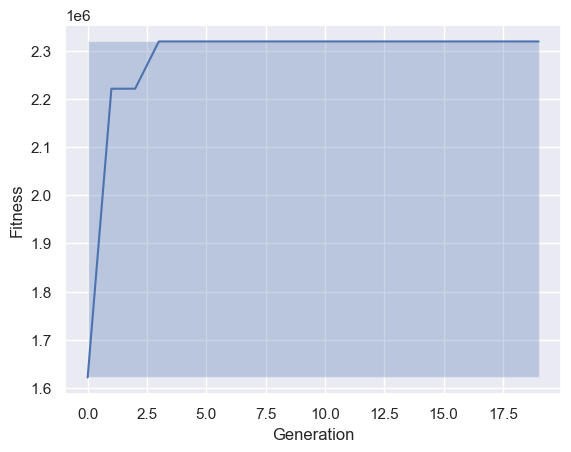

In [ ]:
# Get the mean fitness values for each generation
x = fitness_history_per_exe.mean().index.to_list()
y = fitness_history_per_exe.mean().values

# Create a new figure and axis object and Plot the mean fitness values over generations
fig, ax = plt.subplots()
ax.plot(x, y)
ax.fill_between(x, y.min(), y.max(), alpha=0.3)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()
fig.savefig('plot_0.1_0.9.png')

In [ ]:
# Find the best chromosome across all executions based on fitness value
max_best_per_exe = max(best_per_exe, key=lambda x: x.fitness)
print(max_best_per_exe)
print(max_best_per_exe.assigned_neighbors)

N_BTS: 4, Cost: 1702196.0358623962, Satisfaction: 4021420, Fitness: 2319223.9641376035
{Neighbor(0.5, 0.5, 196): BTS(3.9154703993152262, 3.95927927002673, 345264.29028788506), Neighbor(0.5, 1.5, 887): BTS(3.9154703993152262, 3.95927927002673, 345264.29028788506), Neighbor(0.5, 2.5, 783): BTS(3.9154703993152262, 3.95927927002673, 345264.29028788506), Neighbor(0.5, 3.5, 254): BTS(3.9154703993152262, 3.95927927002673, 345264.29028788506), Neighbor(0.5, 4.5, 678): BTS(3.9154703993152262, 3.95927927002673, 345264.29028788506), Neighbor(0.5, 5.5, 510): BTS(3.9154703993152262, 3.95927927002673, 345264.29028788506), Neighbor(0.5, 6.5, 56): BTS(3.9154703993152262, 3.95927927002673, 345264.29028788506), Neighbor(0.5, 7.5, 310): BTS(3.9154703993152262, 3.95927927002673, 345264.29028788506), Neighbor(0.5, 8.5, 217): BTS(3.9154703993152262, 3.95927927002673, 345264.29028788506), Neighbor(0.5, 9.5, 127): BTS(3.9154703993152262, 3.95927927002673, 345264.29028788506), Neighbor(0.5, 10.5, 74): BTS(3.91

In [ ]:
with open('log_0.1_0.9.txt', 'w') as w:
    w.write(f"{max_best_per_exe}\n")
    w.write(f"--------------------------------------------\n")
    w.write(f"{max_best_per_exe.assigned_neighbors}\n")
    w.write(f"--------------------------------------------\n")
    w.write(f"{max_best_per_exe.bts}")